# WiCHORD Simulator Implementation in Python
Created by Christos-Panagiotis Balatsouras
ORCID: https://orcid.org/0000-0001-8914-7559

## Use Case: Chord Protocol Based Routing Application on Wireless Sensor Networks

Application Functionality:
1. Node Join / Leave
2. Network Build
3. Data Lookup Query

In [1]:
# Import Python Modules
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import secrets
import random

In [2]:
# Import modules from this project
from network_build import network_build
from SensorNode import SensorNode

In [3]:
# Global Variables
# total_runs_per_experiment = 10

### Query class definition

In [4]:
class Query:
    """
    Class Query: Stores useful information about a query such as the type and the num of node hops to resolve the query
    """
    def __init__(self, query_type):
        self.query_type = query_type
        self.query_hops = 0  # variable to calculate the num of hops for a query to be resolved

    def hops_increment(self):
        self.query_hops += 1  # increment the hops between nodes for the query execution

### Main Application

In [5]:
print("+-----------------------------------+")
print("|                                   |")
print("|        Wi-CHORD Simulator         |")
print("|                                   |")
print("+-----------------------------------+")
print("Chord Protocol Application on Wireless Sensor Networks")
print("Implementation by Christos-Panagiotis Mpalatsouras")
print("ORCID: orcid.org/0000-0001-8914-7559")

+-----------------------------------+
|                                   |
|        Wi-CHORD Simulator         |
|                                   |
+-----------------------------------+
Chord Protocol Application on Wireless Sensor Networks
Implementation by Christos-Panagiotis Mpalatsouras
ORCID: orcid.org/0000-0001-8914-7559


In [6]:
print("\nExperiment: Measuring the Average Query Path Length per total number of Nodes\n")


Experiment: Measuring the Average Query Path Length per total number of Nodes



In [7]:
total_runs_per_experiment = int(input("Please Specify the total runs per experiment: "))
minimum_nodes = int(input("Please Specify the minimum num of nodes on the network: "))
maximum_nodes = int(input("Please Specify the maximum num of nodes on the network: "))
step = int(input("Please specify the total nodes increment step: "))

In [8]:
# Main Simulation
results = []  # list to store the results
for total_nodes in range(minimum_nodes, maximum_nodes, step):
    num_of_nodes = total_nodes
    print("\nRunning Experiment with total nodes: ", num_of_nodes)

    # print("\nScanning for nodes to add to the network...")
    node_list = []
    for n in range(0, num_of_nodes + 1):
        mac_address = secrets.token_hex(6)  # Generate random MAC addresses
        node_list.append(SensorNode(mac_address, None))
        # print("Found node with MAC Address: ", mac_address)
    # Sort the list of nodes by NODE ID, TO-DO: Find out a way to build the network without sorting (dynamic)
    node_list.sort(key=lambda node: node.node_id)

    # print("\nAdding nodes to the network...")
    net1 = network_build(node_list)

    # current_node = None

    # Να βάλω να παίρνει ένα κόμβο τυχαία από τη λίστα
    list_of_nodes = net1.List_of_Nodes
    current_node = random.choice(list_of_nodes)

    """
    print(
        "\nYou are connected to the Node with MAC: ",
        current_node.node_name, " and ID: ",
        current_node.node_id, "\n"
    )
    """

    sum_of_lengths = 0  # the sum of query path lengths

    for i in range(0, total_runs_per_experiment):
        # select a random node of the network to be looked up
        dest_node = random.choice(list_of_nodes)
        while dest_node == current_node:  # select a node other than the current
            dest_node = random.choice(list_of_nodes)
        lookup_value = dest_node.node_name
        q1 = Query("lookup")
        lookup_node = current_node.lookup_query(lookup_value, q1)
        # print("\nFound node with ID: ", lookup_node.node_id)
        # lookup_node.sensor_data_print()
        # print("\nQuery type: ", q1.query_type, "\nTotal node hops to resolve this query: ", q1.query_hops)
        sum_of_lengths = sum_of_lengths + q1.query_hops

    local_average_path = sum_of_lengths / total_runs_per_experiment
    local_result = {"Nodes": num_of_nodes, "Avg_Path": local_average_path}
    results.append(local_result)


Running Experiment with total nodes:  5

Running Experiment with total nodes:  10

Running Experiment with total nodes:  15

Running Experiment with total nodes:  20

Running Experiment with total nodes:  25

Running Experiment with total nodes:  30

Running Experiment with total nodes:  35

Running Experiment with total nodes:  40

Running Experiment with total nodes:  45

Running Experiment with total nodes:  50

Running Experiment with total nodes:  55

Running Experiment with total nodes:  60

Running Experiment with total nodes:  65

Running Experiment with total nodes:  70

Running Experiment with total nodes:  75

Running Experiment with total nodes:  80

Running Experiment with total nodes:  85

Running Experiment with total nodes:  90

Running Experiment with total nodes:  95

Running Experiment with total nodes:  100

Running Experiment with total nodes:  105

Running Experiment with total nodes:  110

Running Experiment with total nodes:  115

Running Experiment with total 

In [9]:
results

[{'Nodes': 5, 'Avg_Path': 2.3},
 {'Nodes': 10, 'Avg_Path': 2.2},
 {'Nodes': 15, 'Avg_Path': 2.6},
 {'Nodes': 20, 'Avg_Path': 2.6},
 {'Nodes': 25, 'Avg_Path': 2.7},
 {'Nodes': 30, 'Avg_Path': 3.4},
 {'Nodes': 35, 'Avg_Path': 4.0},
 {'Nodes': 40, 'Avg_Path': 3.0},
 {'Nodes': 45, 'Avg_Path': 2.9},
 {'Nodes': 50, 'Avg_Path': 5.1},
 {'Nodes': 55, 'Avg_Path': 4.1},
 {'Nodes': 60, 'Avg_Path': 3.4},
 {'Nodes': 65, 'Avg_Path': 3.2},
 {'Nodes': 70, 'Avg_Path': 4.2},
 {'Nodes': 75, 'Avg_Path': 3.5},
 {'Nodes': 80, 'Avg_Path': 5.0},
 {'Nodes': 85, 'Avg_Path': 5.1},
 {'Nodes': 90, 'Avg_Path': 4.2},
 {'Nodes': 95, 'Avg_Path': 3.7},
 {'Nodes': 100, 'Avg_Path': 4.4},
 {'Nodes': 105, 'Avg_Path': 4.3},
 {'Nodes': 110, 'Avg_Path': 4.0},
 {'Nodes': 115, 'Avg_Path': 4.6},
 {'Nodes': 120, 'Avg_Path': 4.0},
 {'Nodes': 125, 'Avg_Path': 4.1},
 {'Nodes': 130, 'Avg_Path': 4.9},
 {'Nodes': 135, 'Avg_Path': 3.9},
 {'Nodes': 140, 'Avg_Path': 4.3},
 {'Nodes': 145, 'Avg_Path': 4.2},
 {'Nodes': 150, 'Avg_Path': 4.4},


In [10]:
nodes_num = []
avg_path = []
for item in results:
    nodes_num.append(item["Nodes"])
    avg_path.append(item["Avg_Path"])

In [11]:
nodes_num

[5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495,
 500]

In [12]:
avg_path

[2.3,
 2.2,
 2.6,
 2.6,
 2.7,
 3.4,
 4.0,
 3.0,
 2.9,
 5.1,
 4.1,
 3.4,
 3.2,
 4.2,
 3.5,
 5.0,
 5.1,
 4.2,
 3.7,
 4.4,
 4.3,
 4.0,
 4.6,
 4.0,
 4.1,
 4.9,
 3.9,
 4.3,
 4.2,
 4.4,
 4.9,
 4.6,
 4.4,
 4.4,
 5.0,
 4.2,
 3.7,
 4.5,
 4.5,
 3.7,
 5.3,
 4.7,
 5.5,
 5.3,
 4.6,
 4.4,
 4.5,
 4.1,
 3.4,
 4.4,
 5.4,
 4.5,
 5.0,
 5.0,
 5.1,
 4.7,
 5.2,
 5.1,
 4.5,
 4.8,
 5.4,
 5.0,
 4.3,
 4.8,
 5.4,
 5.2,
 4.2,
 5.5,
 4.8,
 4.3,
 5.1,
 4.7,
 4.2,
 4.5,
 5.9,
 5.5,
 5.0,
 4.4,
 4.9,
 6.1,
 5.2,
 4.4,
 5.5,
 5.2,
 5.6,
 6.0,
 5.3,
 4.1,
 5.2,
 4.7,
 5.1,
 5.8,
 5.1,
 5.3,
 4.2,
 4.8,
 5.2,
 5.0,
 5.7,
 6.0]

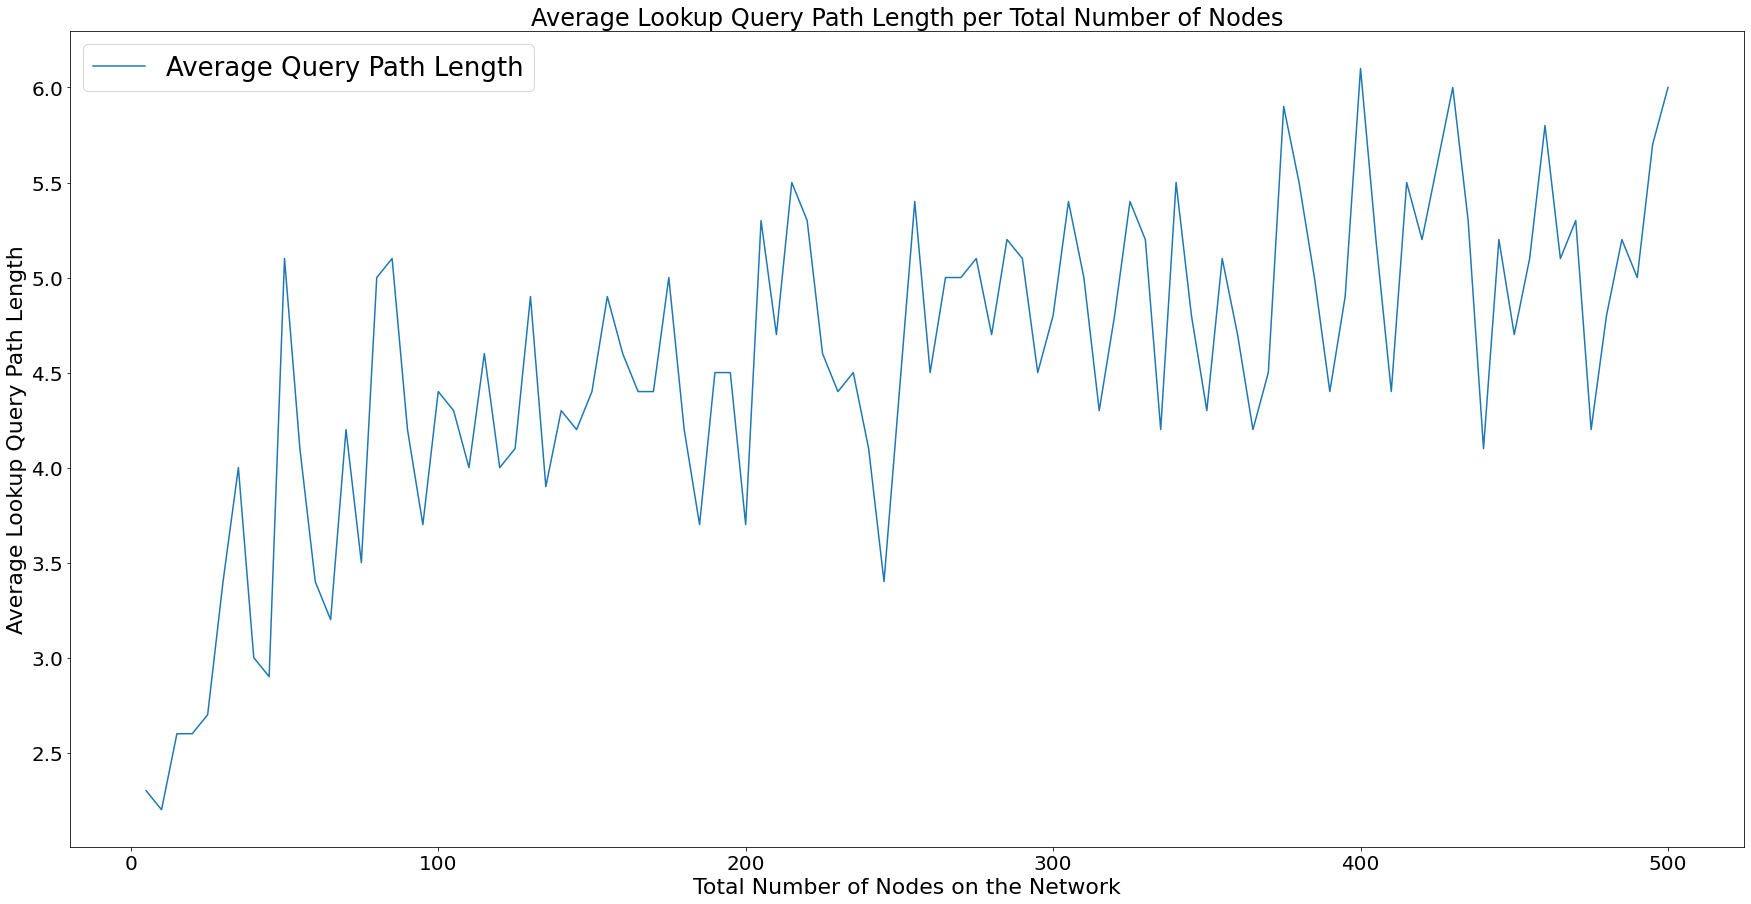

In [13]:
# Plot the simulation results
# Set the appearance parameters for the plots
mpl.rcParams['figure.figsize'] = [30, 15]
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['axes.labelsize'] = 25

plt.plot(nodes_num, avg_path, label='Average Query Path Length')

plt.ylabel("Average Lookup Query Path Length", fontsize=22)
plt.xlabel("Total Number of Nodes on the Network", fontsize=22)
plt.title("Average Lookup Query Path Length per Total Number of Nodes", fontsize=24)
plt.legend(prop={'size': 26})

plt.show()